# Car Price Prediction

## Importing libraries

In [46]:
# Pandas for data loading and numpy for nnumerical analysis
import pandas as pd
import numpy as np

# Data Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Checking outliers
from scipy import stats

# Handling warnings
import warnings
warnings.filterwarnings(action="ignore")

# Machine learning Models for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading the dataset

In [4]:
# Loading the csv dataset

df=pd.read_csv("C:/Users/ADMIN/Downloads/car_price_prediction.csv.zip")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Data cleaning and Preprocessing

In [5]:
# Checking fot missing values in the data

df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#### For the above output, there is no missing values in the  data.
#### Now we want to diplay data information, the info() function shows columns names for the dataset, Non-Null Counts for each and every column and their respective data types. The below query shows there are 18 columns to which 1 is a float64, 4 are integers, and the rest are objects/strings as well as 19237 rows.

In [6]:
# Displaying the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
# Showing number of rows and columns in the dataframe respectively

df.shape

(19237, 18)

In [8]:
# The dataframes columns are:

df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## Exploratory Data Analysis

### Data description

In [9]:
# Display basic statistics of numerical features

df[["Price","Cylinders","Airbags"]].describe()

,Price,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,4.582991,6.582627
std,1.905813e+05,1.199933,4.320168
min,1.000000e+00,1.000000,0.000000
25%,5.331000e+03,4.000000,4.000000
50%,1.317200e+04,4.000000,6.000000
75%,2.207500e+04,4.000000,12.000000
max,2.630750e+07,16.000000,16.000000


In [10]:
# Calculating Frequency where columns == objects

for column in df.columns:
    if df[column].dtype == "object":
        frequency = df[column].value_counts()
        print(frequency.head())

Levy
-      5819
765     486
891     461
639     410
640     405
Name: count, dtype: int64
Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
Name: count, dtype: int64
Model
Prius      1083
Sonata     1079
Camry       938
Elantra     922
E 350       542
Name: count, dtype: int64
Category
Sedan        8736
Jeep         5473
Hatchback    2847
Minivan       647
Coupe         532
Name: count, dtype: int64
Leather interior
Yes    13954
No      5283
Name: count, dtype: int64
Fuel type
Petrol    10150
Diesel     4036
Hybrid     3578
LPG         892
CNG         494
Name: count, dtype: int64
Engine volume
2      3916
2.5    2277
1.8    1760
1.6    1462
1.5    1321
Name: count, dtype: int64
Mileage
0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
Name: count, dtype: int64
Gear box type
Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: count, dtype: int64
Dri

#### Finding the mode of prod year using value_counts() function.This helps clients/sellers to identify number of latest to oldest cars in the market.

In [11]:
# Number of prod. Year apperance in the entire dataset.

df["Prod. year"].value_counts()

Prod. year
2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
2010    1483
2016    1476
2017     959
2008     737
2009     601
2018     500
2007     464
2005     402
2003     367
2004     364
2006     317
2019     306
2002     296
2000     279
2001     254
1998     213
1999     207
1997     151
1996     114
1995     105
2020      47
1994      42
1992      30
1993      23
1990      18
1988      12
1991      10
1986       6
1989       6
1987       5
1984       5
1985       5
1953       4
1983       3
1939       3
1978       2
1980       2
1965       2
1977       2
1974       2
1964       2
1943       1
1976       1
1957       1
1968       1
1947       1
1982       1
1981       1
1973       1
Name: count, dtype: int64

### Checking for outliers in price

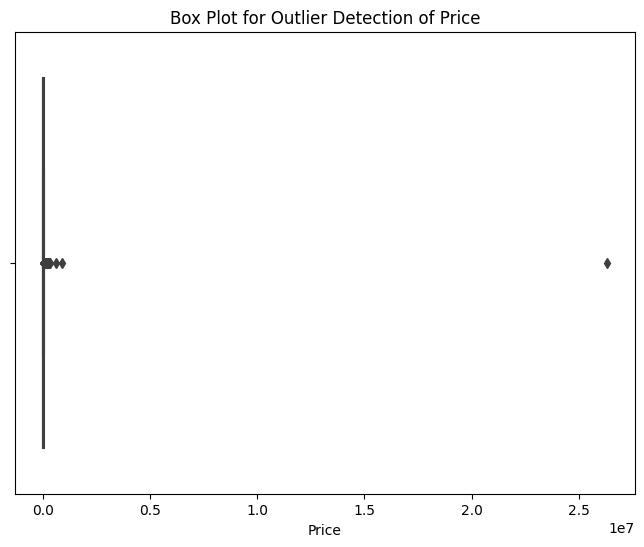

Index([1225, 8541, 16983], dtype='int64')


In [12]:
# Box plot for outlier detection of Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.xlabel('Price')
plt.title('Box Plot for Outlier Detection of Price')
plt.show()

# Z-score method for outlier detection of Price
z_scores = stats.zscore(df['Price'])
outliers = (np.abs(z_scores) > 3)
outlier_indices = df.index[outliers]
print(outlier_indices)


### Data Visualization

#### Box plot 

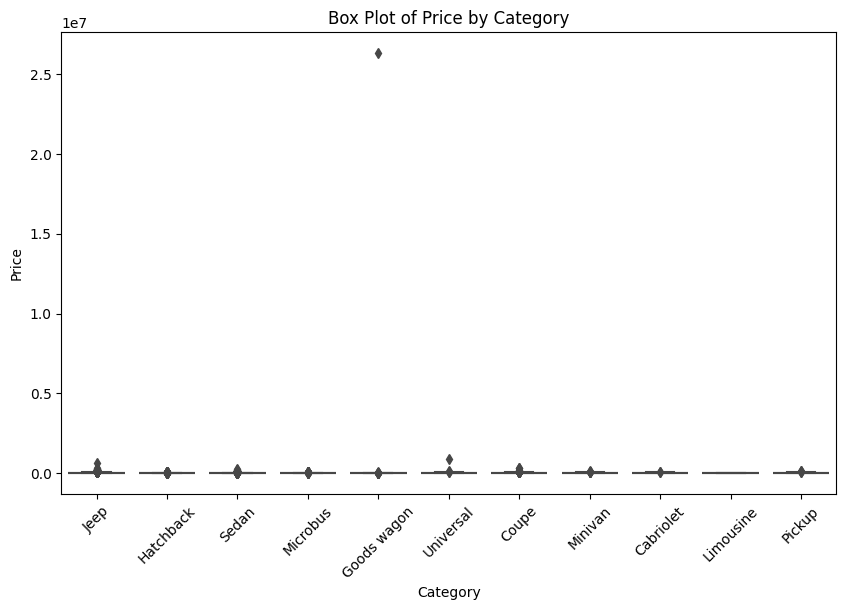

In [13]:
# Box plot of Price by Category

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=df)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Box Plot of Price by Category')
plt.xticks(rotation=45)
plt.show()

#### Bar plot

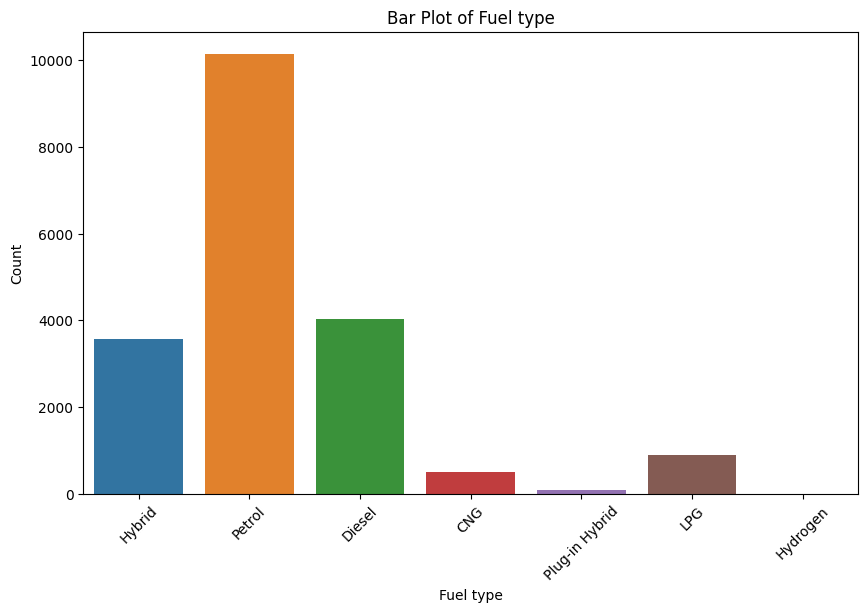

In [14]:
# Bar plot of categorical feature 'Fuel type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel type', data=df)
plt.xlabel('Fuel type')
plt.ylabel('Count')
plt.title('Bar Plot of Fuel type')
plt.xticks(rotation=45)
plt.show()

#### The above output shows that most of the vehicles being sold consume Petrol as source of energy and Hydrogen for least number of vehicles

#### Below bar plots provides an eyesight for largest to the smallest manufacturer in the industry. This helps clients and sellers to understand customer manufacturer preferences.

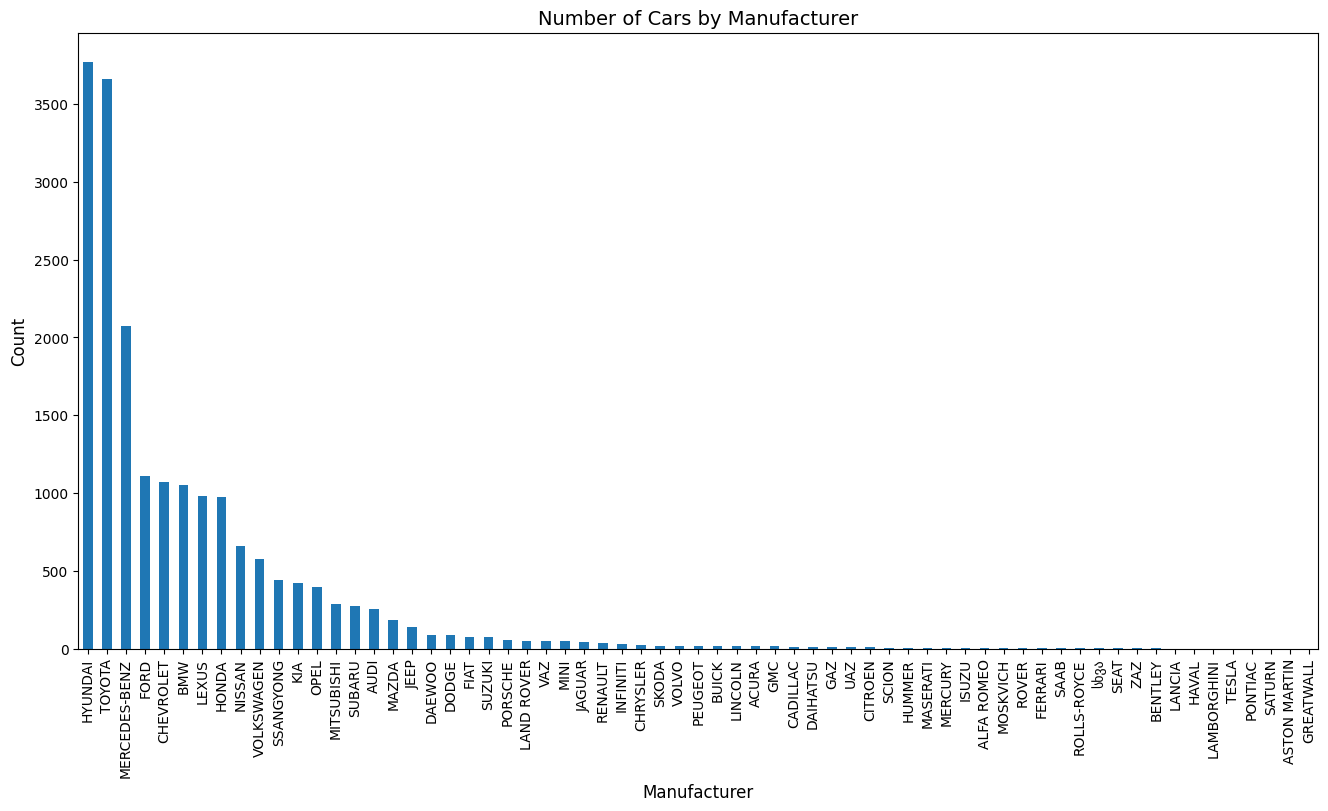

In [26]:
# Bar chart for the manufacturers
manufacturer_count=df['Manufacturer'].value_counts()

plt.figure(figsize=(16, 8))
manufacturer_counts.plot(kind='bar')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Cars by Manufacturer', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## The ML-Model and Prediction

#### Convering categorical columns to numerical columns for prediction hence use df.info() to check the conversion if it is successful

In [39]:
# List of columns to convert to numeric
columns_to_convert = ['Prod. year', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Convert columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     17306 non-null  float64
 10  Mileage           0 non-null      float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### The Gradient Boosting Regressor

In [45]:
# Separate features and target variable
X = df.drop(['ID','Price'], axis=1)
y = df['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
numerical_features = ['Prod. year', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Append the regressor to the preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


Mean Absolute Error: 8142.588335570141
Mean Squared Error: 176995159.29363745
Root Mean Squared Error: 13303.952769520698
R-squared: 0.43197342026910734


 ### The Random Forest Regressor

In [ ]:
# Separate features and target variable
X = df.drop(['ID','Price'], axis=1)
y = df['Price']

# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
numerical_features = ['Prod. year', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Append the regressor to the preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)